# Assignment 3 - Supervised Learning

## *Nathan Warren*
Netid: naw32

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)**
The likelihood for all observations is:

$$P(y|X) = \prod_{i = 1}^{N}P(y_{i}|x_{i}) $$

$$= \prod_{i = 1}^{N}P(y_{i} = 1|x_{i})^{y_{i}} P(y_{i} = 0|x_{i})^{1-y_{i}}$$

$$\boxed{ = \prod_{i = 1}^{N}\sigma(w^{T}x_{i})^{y_{i}} [1 - \sigma(w^{T}x_{i})]^{1 - y_{i}}} $$

**(b)**
The cost function for logistic regression is the cross enropy.



$$C(w) = -ln[\prod_{i = 1}^{N}\sigma(w^{T}x_{i})^{y_{i}} [1 - \sigma(w^{T}x_{i})]^{1 - y_{i}}]$$

$$ = -\prod_{i=1}^{N} ln[\sigma(w^{T}x_{i})^{y_{i}} [1 - \sigma(w^{T}x_{i})]^{1 - y_{i}}] $$

$$\boxed{ = -\sum_{i=1}^{N} y_{i}ln[(\sigma(w^{T}x_{i}))]+ [1 - y_{i}] ln[1 - \sigma(w^{T}x_{i})]}$$





**(c)** 

Partial derivatives 
$$-\sum_{i=1}^{N} y_{i}ln[(\sigma(w^{T}x_{i}))]+ [1 - y_{i}] ln[1 - \sigma(w^{T}x_{i})]$$

$$\text{Set}\; z = \sigma(w^{T}x_{i})$$

$$\text{Set}\; q = w^{T}x_{i}$$

$$-\sum_{i=1}^{N} y_{i} ln(z)+ [1 - y_{i}] ln[1 - z]$$

$$\dfrac{\partial }{\partial z_0}=  -\sum_{i=1}^{N}\dfrac{\partial z}{\partial w} y_{i} ln(z) \;\; \dfrac{\partial z}{\partial w} [1 - y_{i}] ln[1 - z]$$

$$\dfrac{\partial C}{\partial z} = (-\sum_{i=1}^{N}\frac{y_{i}}{z} + \dfrac{1-y_{i}}{1-z}) * (\frac{1}{z}-1)z^{2} $$

$$ = -\sum_{i=1}^{N} (z-y_{i})\dfrac{\partial z}{\partial w} $$

$$\boxed{\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right] = \left[-\sum_{i=1}^{N} (z-y_{i}), -\sum_{i=1}^{N} (z-y_{i})x_{i,1}, -\sum_{i=1}^{N} (z-y_{i})x_{i,2} \right]}$$

**(d)**
Gradient of the cost function is defined as:

$$x^{(i+1)} = x^{i} - \eta^{\nabla}f(x^{(i)})$$


$$\boxed{- \eta \left[-\sum_{i=1}^{N} (z-y_{i}), -\sum_{i=1}^{N} (z-y_{i})x_{i,1}, -\sum_{i=1}^{N} (z-y_{i})x_{i,2} \right]} $$

**(e)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import and 
df = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A3_Q1_data.csv")
df.head(5)

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


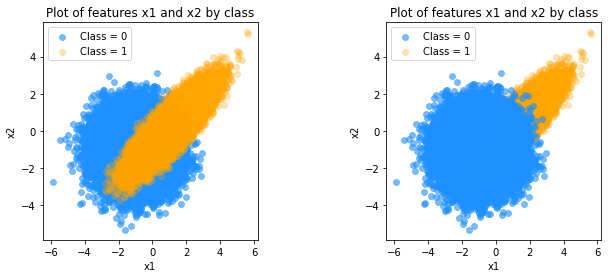

In [4]:
# Subset for ease of plotting
df_y0 = df[df['y'] == 0] 
df_y1 = df[df['y'] == 1] 

# Set colors
colors = ["dodgerblue", "orange"]
sns.set_palette(sns.color_palette(colors))

# Plot 1
# Figure settings
fig = plt.figure(figsize = (10,4))
fig.subplots_adjust(wspace=0.6)

# Subplots
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(df_y1['x1'], df_y1['x2'], alpha = .6, edgecolor = None, label = 'Class = 0', ax=ax)
sns.scatterplot(df_y0['x1'], df_y0['x2'], alpha = .3, edgecolor = None, label = 'Class = 1', ax=ax)
plt.title("Plot of features x1 and x2 by class")


# Plot 2 
# Set colors
colors = ["orange", "dodgerblue"]
sns.set_palette(sns.color_palette(colors))

ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(df_y0['x1'], df_y0['x2'], alpha = .3, edgecolor = None, label = 'Class = 1', ax = ax)
sns.scatterplot(df_y1['x1'], df_y1['x2'], alpha = .6, edgecolor = None, label = 'Class = 0', ax = ax)

# Reverse legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')  
plt.title("Plot of features x1 and x2 by class")

plt.show()

The data are unlikely to be separable as a majority of the data overlaps. There is no hyperplane that can separate classes well. Logistic regression would be a good choice for this data as class would be predicted based on $x_{1}$ and $x_{2}$. 


**(f)**

In [5]:
# (f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?
# Even split of y = 0 and y =1, same count for all variables
df.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [6]:
# No missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   y       100000 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


There are no missing values or scale differences. The response variable, $y$, is evenly split with 50,000 observations for $y$ = 0 and 50,000 observations for $y$ = 1. Both features have a somewhat normal distribution. 

**(g-i)**

In [7]:
# (g) Create a function or class to implement your logistic regression. 
# It should take as inputs the model parameters,  𝐰=[𝑤0,𝑤1,𝑤2]⊺ , and output the class confidence probabilities,  𝑃(𝑌=𝑦𝑖|𝑋=𝐱𝑖) .
import numpy as np
def logit(w, x):
    n = x.shape[0]
    x = np.concatenate((np.ones((n, 1)), x), axis=1)
    py = 1/(1+np.exp(-np.dot(x, w.T)))
    return py

In [19]:

# (h) Create a function that computes the cost function  𝐶(𝐰)  for a given dataset and corresponding class labels.

def cost(w, x, y): 
    CE = - (np.sum(y * np.log(logit(w,x)) + np.dot(1-y).T, np.log(1-logit(w,x)))).mean()
    return CE
    pass

def gradient(w, x, y):
    n=x.shape[0]
    py = logit(w,x)
    x = np.concatenate((np.ones((n, 1)), x), axis=1)
    return np.dot(x.T, py-y)/n

# (i) Gradient Descent 
def gradient_descent(x_train, y_train, x_test, y_test, learnR):
    train_output = []
    test_output = []
    step_size = 1e-6
    #Ensure start, we need to at a random place on the curve
    np.random.seed(222)
    weight_start = np.random.rand(x.shape[0])
    # This is to stop the function when it reaches difference being less than the learning rate
    while step_size >= 1e-6:
        lgit = logit(w,x)
        #Starting weight (used to calc stepsize)
        weight_start_norm = np.linalg.norm(weight_start)
        # End
        weight_end = weight_start - learnR*gradient(w, x_train, y_train)
        # Used to calc step_size
        weight_end_norm = np.linalg.norm(weight_end)
        #Stepsize update for next iteration
        step_size = abs(weight_end_norm - weight_start_norm)
        # Save em
        train_output.append(cost(weight_end, x_train, y_train))
        test_output.append(cost,(weight_end, x_test, y_test))
        #Set the new weight starting
        weight_start = weight_end
        return Output

In [23]:
# Testing 
np.random.seed(123)
x_in = df[['x1', 'x2']].to_numpy()
w = np.random.rand(1,3)
x = x_in

logit(w,x)

array([[0.81811659],
       [0.61199263],
       [0.62748276],
       ...,
       [0.70779483],
       [0.79106225],
       [0.38921282]])

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question

The parameter, learnR is the learning rate. The learning rate helps determine how large the step size will be for each iteration after the first.  As the algorithm nears the local minimum (where the slope is close to 0), it takes smaller and smaller steps. This is achieved by having the gradient multipled by the learning rate, this value is then subtracted from the starting weight. This formula gives us the end location of the step! It is important to have a good sized learning rate. Too small, and more iterations are needed to reach the local minimum. Too big and you may end up missing the local minimum and end up of the other side of the curve.

In [24]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size = 0.3)
train_x = train[['x1','x2']].to_numpy()
train_y = train['y'].to_numpy()
test_x = test[['x1','x2']].to_numpy()
test_y = test['y'].to_numpy()

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance.

In [ ]:
from sklearn.model_selection import StratifiedKFold as kfold
# Create 5 folds

#5-fold validation
K = kfold(n_splits = 5, shuffle = True, random_state = 222)

# print(K)
#K.get_n_splits(train_x,train_y)
# For storing predictions
prediction_scores = np.empty(train_y.shape[0], dtype='object')

#Extract the training and validation data for this fold
#for train_index, val_index in K.split(train_x, train_y):
 #   x_trainer, x_valid = train_x[train_index], train_x[val_index]
  #  y_trainer, y_valid = train_y[train_index], train_y[val_index]
    
# Train LR classifier
learnR = [0.1, 0.5, 0.9, 1.3, 1.7]
labeler = ['Training_Cost']
for lr in learnR:
    train_output = gradient_descent(train_x, train_y, test_x, test_y, lr)
    plt.plot(train_output, label = str(labeler) + {lr})

**(m)** Why do we use cross validation?

Cross validation is used as a method to evaluate the predtive capabilities of our model. Overfitting can be shown by cross-validation. Test data is not used when training a model, but rather serves as 'future data' in context. This means that we are analyzing how well our model classifies new information. This gives the model maker a good idea of how it will perform in general. The more we validate our model, the more confident we can be in its performance. 

(n) Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)**

In [19]:
# Load mnist from keras datasets
import keras
mnist = keras.datasets.mnist

# Train and Test variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [20]:
# Ensure everything looks good
print(f'x_train = {x_train.shape}\n y_train = {y_train.shape}\n x_test = {x_test.shape}\n y_test ={y_test.shape}')

x_train = (60000, 28, 28)
 y_train = (60000,)
 x_test = (10000, 28, 28)
 y_test =(10000,)


In [21]:
#Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise.
# Must change values in y_train for binary classification

y_train[y_train != 3] = 0
y_train[y_train == 3] = 1

y_test[y_test != 3] = 0
y_test[y_test == 3] = 1

# Ensure everything went correctly
print(np.unique(y_train), np.unique(y_test))

[0 1] [0 1]


**(b)**

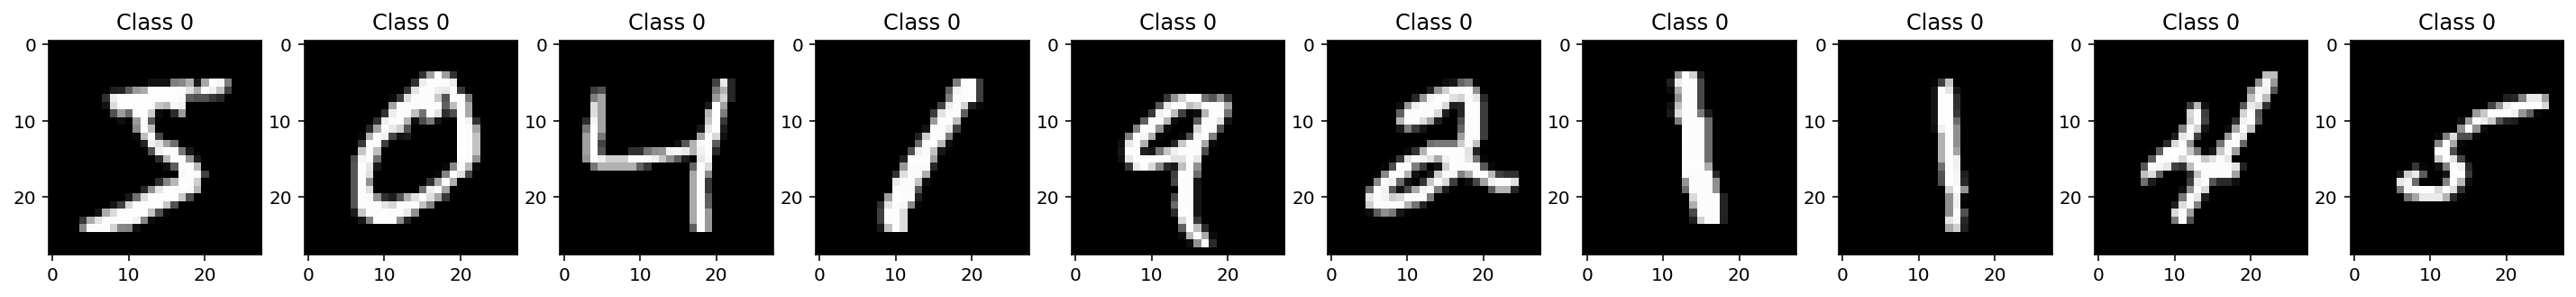

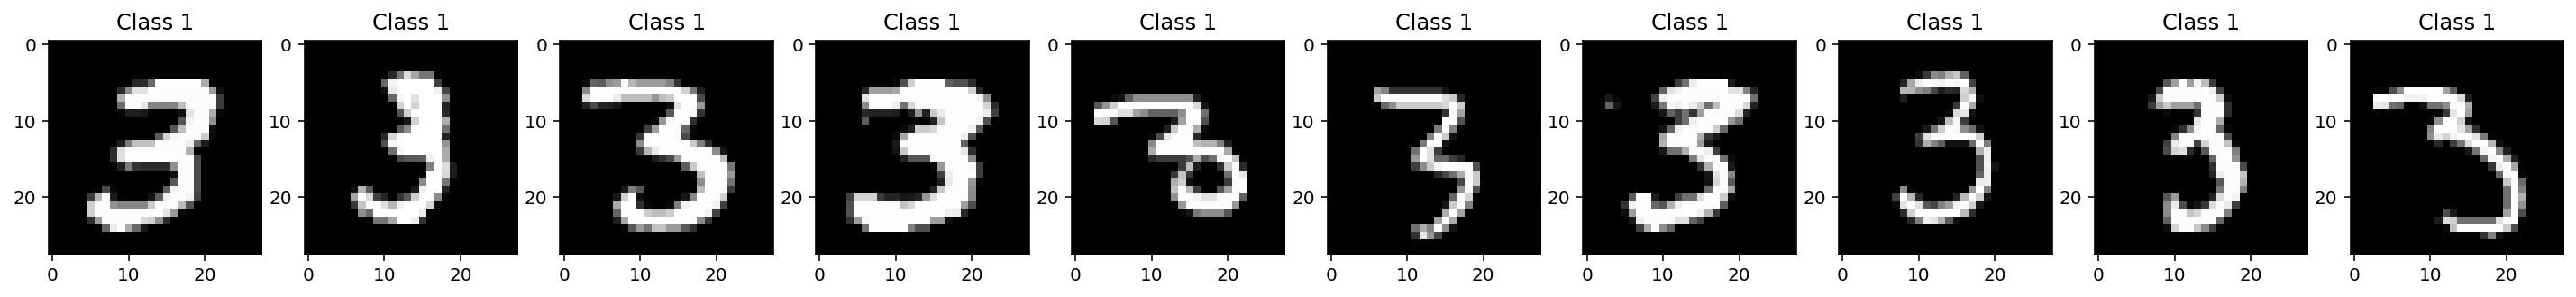

In [22]:
# Plot 10 examples of each class (i.e. class  𝑦=0 , which are not 3's and class  𝑦=1  which are 3's), from the training dataset.

# Sort

#Class 0 from training
plt.figure(figsize = (25,25))
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[y_train ==0][i], cmap = 'gray')
    plt.title("Class 0")
plt.show()

#Class 0 from training
plt.figure(figsize = (25,25))
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[y_train ==1][i], cmap = 'gray')
    plt.title("Class 1")
plt.show()

**(c)**

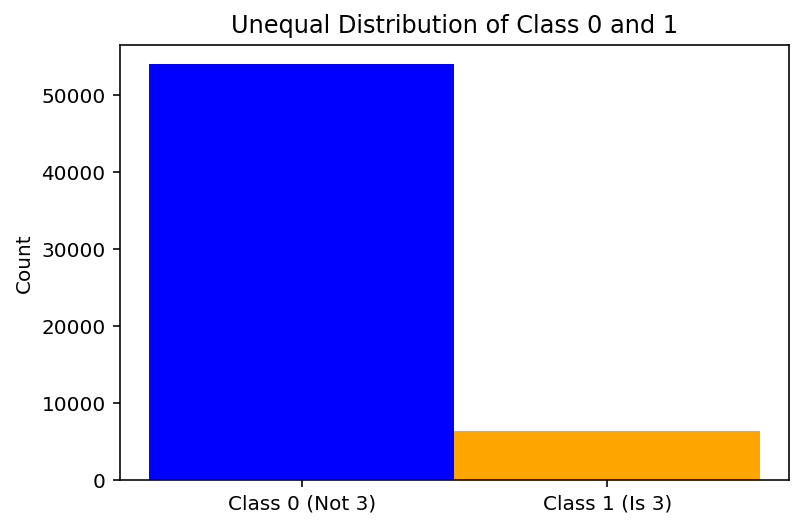

In [23]:
#How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

one = x_train[y_train ==1].shape[0]
zero = x_train[y_train ==0].shape[0]

# Plot the distribution
barlist = plt.bar([1, 2], [zero, one], width=.9933, tick_label=['Class 0 (Not 3)', 'Class 1 (Is 3)'], align='center')
plt.title('Unequal Distribution of Class 0 and 1')
plt.ylabel('Count')
#barlist=plt.bar([1,2], [one.shape[0], zero.shape[0]])
barlist[0].set_color('blue')
barlist[1].set_color('orange')
plt.show()

In [24]:
# See what percentage Class 1 and 0 are in x_train
print(f'Class 1: {one/(zero+one) * 100:.2f}%')
print(f'Class 0: {zero/(zero+one) * 100:.2f}%')

Class 1: 10.22%
Class 0: 89.78%


The distribution between Class 0 (3), and Class 1 (not 3) is very unbalanced. Having this imbalance can skew our predicted probabilities towards Class 0. This means the model has less to learn from in Class 1. This can lead to what is called the 'Accuracy Paradox.' In this situation, our model could predict only Class 0 and it would have an accuracy of 89.78% which seems pretty good, but clearly the model is not actually performing well. In these situations it is important to check metrics such as true negative rate, recall, precision, and negative predictive value.

**(d)**

In [25]:
# Reshaping
# Combine the 28*28 pixels to 784 
n, xx, xy = x_train.shape
x_train = x_train.reshape((n,xx*xy))

n, xx, xy = x_test.shape
x_test = x_test.reshape((n,xx*xy))

In [26]:
#Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a 
# classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. 

import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import StratifiedKFold as kfold

#5-fold validation
K = kfold(n_splits = 5, shuffle = True, random_state = 222)
K.get_n_splits(x_train,y_train)
# print(K)

# For storing predictions
prediction_scores = np.empty(y_train.shape[0], dtype='object')

# Extract the training and validation data for this fold
for train_index, val_index in K.split(x_train, y_train):
    x_trainer, x_valid = x_train[train_index], x_train[val_index]
    y_trainer, y_valid = y_train[train_index], y_train[val_index]
    
    # Train LR classifier
    clf = LR()
    clf.fit(x_trainer, y_trainer)
    
    # Testing on validation for kth fold
    predprob =clf.predict_proba(x_valid)
    y_output = clf.predict(x_valid)

    # Save the predictions for this fold
    prediction_scores[val_index] = predprob[:, 1]

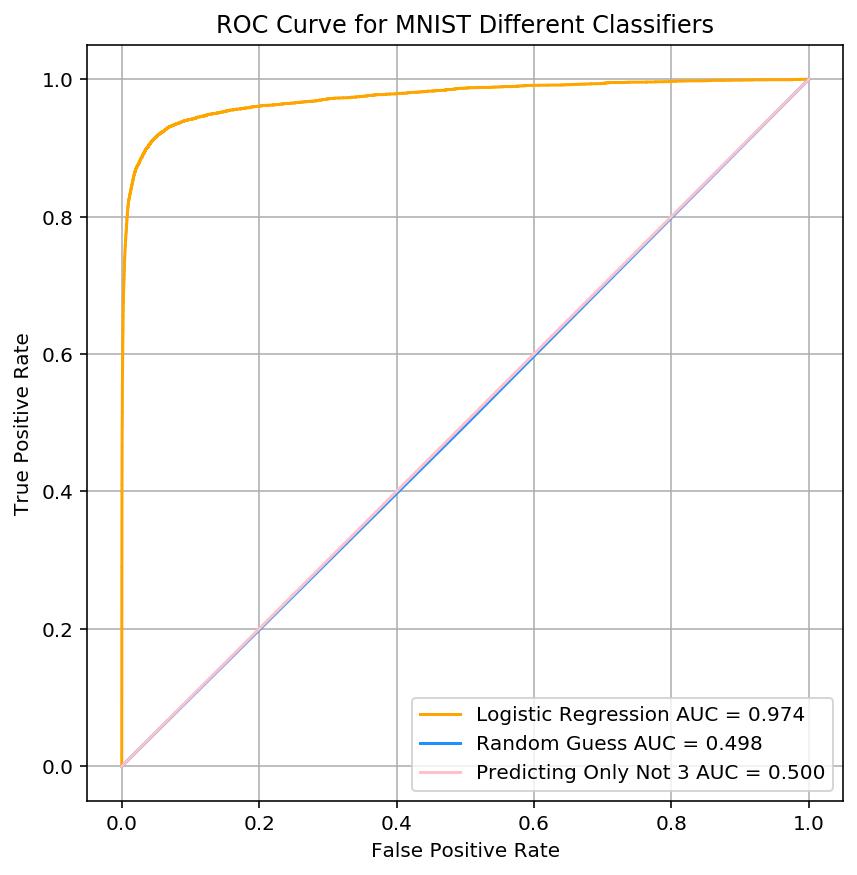

In [27]:
from sklearn import metrics
# FPR, TPR, Threshold
fpr, tpr, threshold = metrics.roc_curve(y_train, prediction_scores, pos_label=1)
auc = metrics.roc_auc_score(y_train, prediction_scores)
legend_string = 'Logistic Regression AUC = {:0.3f}'.format(auc)


plt.figure(figsize=(6,6))

# Log Reg ROC Plot
plt.plot(fpr, tpr, label=legend_string)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.legend()
plt.tight_layout()
plt.title("ROC Curve for MNIST Different Classifiers")

# Random ROC 
random = np.random.randint(2, size = y_train.shape[0])
fpr, tpr, threshold = metrics.roc_curve(y_train, random, pos_label=1)
auc = metrics.roc_auc_score(y_train, random)
legend_string = 'Random Guess AUC = {:0.3f}'.format(auc)
plt.plot(fpr,tpr, label = legend_string)

# Not 3 (Class 0) ROC
zeros = np.zeros(y_train.shape[0])
fpr, tpr, threshold = metrics.roc_curve(y_train, zeros, pos_label=1)
auc = metrics.roc_auc_score(y_train, zeros)
legend_string = 'Predicting Only Not 3 AUC = {:0.3f}'.format(auc)
plt.plot(fpr,tpr, label = legend_string, c = 'pink')

plt.legend()
plt.show()

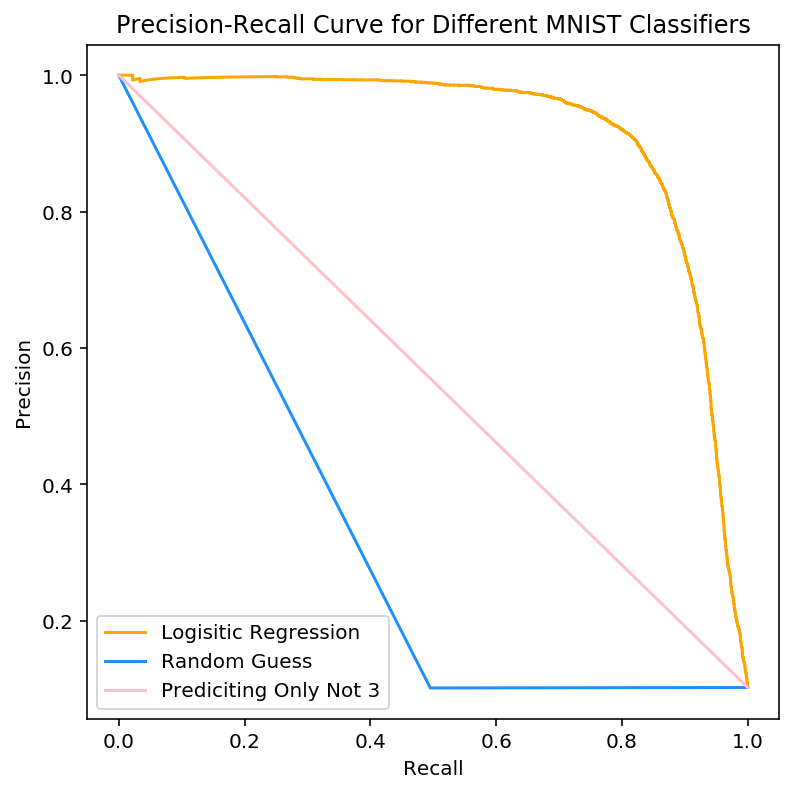

In [28]:
from sklearn.metrics import precision_recall_curve as PRC
plt.figure(figsize=(6.2,6.2))

# Logisitc Regression
precision,recall,threshold = PRC(y_train, prediction_scores, pos_label =1)
plt.plot(recall, precision, label = 'Logisitic Regression')

# Random Guess
precision,recall,threshold = PRC(y_train, random, pos_label =1)
plt.plot(recall, precision, label = 'Random Guess')

# Not 3 (Class 0) 
precision,recall,threshold = PRC(y_train, zeros, pos_label =1)
plt.plot(recall, precision, label = 'Prediciting Only Not 3', color = 'pink')
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title('Precision-Recall Curve for Different MNIST Classifiers')
plt.show()

**(d)** Describe the algorithm's performance and explain any discrepancies you find.

The logisitc regression preformed very well, achieving and AUC of 0.974. Randomly guessing and predicting only Class 0 had an AUC around 0.5. The precision-recall curve also indicates that the logistic regression was better at clasifying.

**(e)**

In [36]:
# Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of 
# values on the regularization coefficient. You can implement this using the LogisticRegression module  (DO NOT use your function from question 1) and activating 
# the 'l1' penalty; the parameter  𝐶  is the inverse of the regularization strength. As you vary the regularization coefficient, plot 

#(1) the number of model parameters that are estimated to be nonzero; 
#(2) the logistic regression cost function, which you created a function to evaluate in the Question 1; 
#(3)  𝐹1 -score, and 
#(4) area under the curve (AUC). 

# Describe the implications of your findings.
from sklearn.linear_model import LogisticRegression as LR
# lists for storage of 4 plot things
notzero = []
auc = []
f1 = []
costfct = []

lambd = np.logspace(-5,5,11)

# FL for train test over lambd
for c in lambd:
    l1 = LR(penalty = 'l1', C = c, solver = 'liblinear')
    l1.fit(x_train, y_train)
    
    # Store results in these variables
    y_hat_test_predict = l1.predict(x_test)
    y_hat_test_predprob = l1.predict_proba(x_test)[:,1]
    
    #Notzero store
    nz = np.count_nonzero(l1.coef_)
    notzero.append(nz)
    
    # Cost function
    #weight = np.append(l1.coef_, l1.intercept_)
    #ctest = cost(w, test_x, test_y)
   # costfct.append(ctest)
    
    # F1-score
    f = metrics.f1_score(y_test, y_hat_test_predict, pos_label = 1)
    f1.append(f)
    
    # AUC
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_test_predprob, pos_label=1)
    ac = metrics.roc_auc_score(y_test, y_hat_test_predprob)
    auc.append(ac)

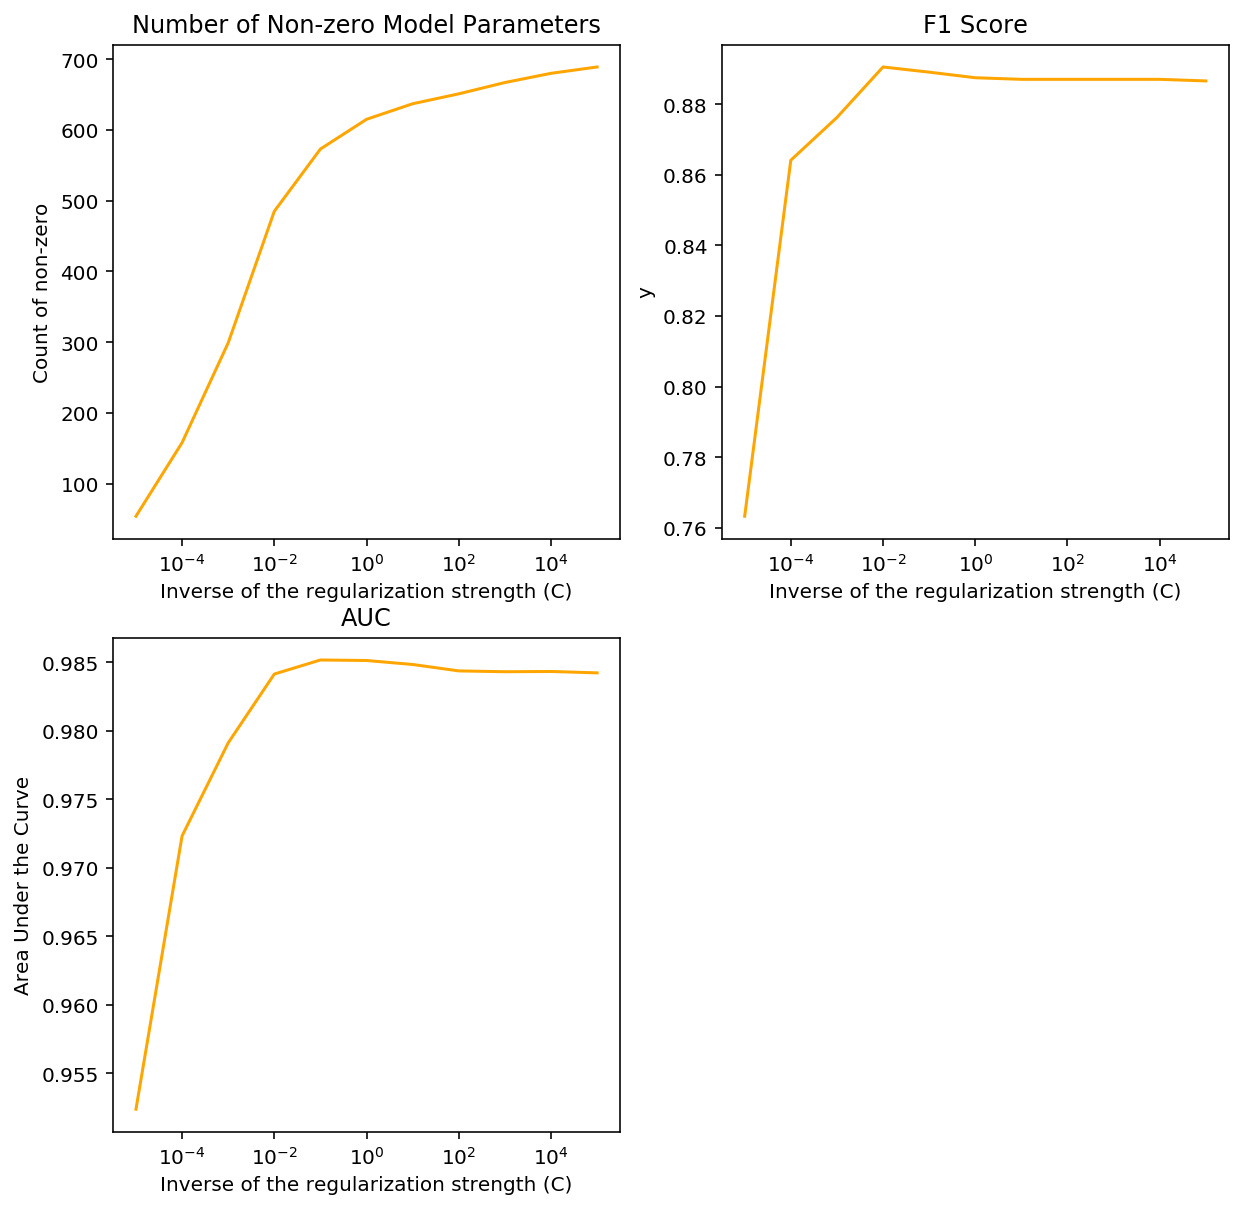

In [40]:
plt.figure(figsize = (10,10))

# Not Zero
plt.subplot(2,2,1)
plt.plot(lambd, notzero)
plt.xscale("log")
plt.title("Number of Non-zero Model Parameters")
plt.xlabel('Inverse of the regularization strength (C)')
plt.ylabel('Count of non-zero')

# F-1 Score
plt.subplot(2,2,2)
plt.plot(lambd, f1)
plt.xscale("log")
plt.xlabel('Inverse of the regularization strength (C)')
plt.ylabel('y')
plt.title("F1 Score")

# AUC
plt.subplot(2,2,3)
plt.plot(lambd, auc)
plt.xscale("log")
plt.xlabel('Inverse of the regularization strength (C)')
plt.ylabel('Area Under the Curve')
plt.title("AUC")

# Cost Function
#plt.subplot(2,2,4)
#plt.plot(lambd, costfct)
#plt.xscale("log")
plt.xlabel('Inverse of the regularization strength (C)')
#plt.ylabel('y')
plt.show()


## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**ANSWER**

**(a)**

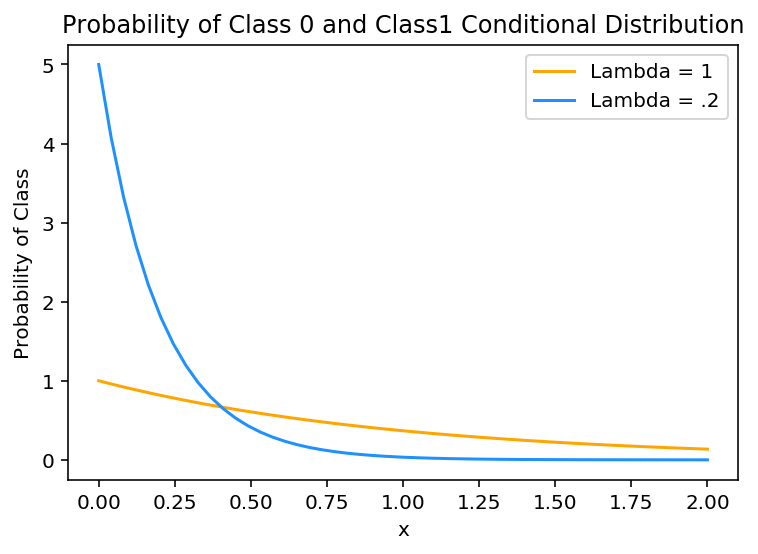

In [34]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

#Linspace for area
x = np.linspace(0,2)

#Exponential distributions
exp1 = expon.pdf(x, scale = 1)
exp2 = expon.pdf(x, scale = .2)

plt.figure(figsize = (6,4))
plt.plot(x, exp1, label = 'Lambda = 1')
plt.plot(x, exp2, label = 'Lambda = .2')
plt.title('Probability of Class 0 and Class1 Conditional Distribution')
plt.xlabel('x')
plt.legend()
plt.ylabel('Probability of Class')
plt.show()

**(b)** Prior class dsitrubtion is 0.5 for both probability of classes:

$$P(C_{i}|x) = \frac{P(x|C_{i})P(C_{i})}{P(x)}$$

$$P(C_{0}|x) = \frac{P(x|C_{0})P(C_{0})}{P(x)}
={e^{-x}\times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5}$$


$$P(C_{1}|x) = {P(x|C_{1})P(C_{1})}{P(x)}
={5e^{-5x}\times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5}$$


Decision Rule: If $x > x^*$, then predict Class 0(left), otherwise predict Class 1(right)


$$\frac{e^{-x} \times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5} = \frac{5e^{-5x} \times 0.5}{e^{-x} \times 0.5 + 5e^{-5x} \times 0.5}$$
$\ $
$$ e^{-x} = 5e^{-5x}$$
$\ $
$$ \frac{1}{5} = e^{-4x}$$
$\ $
$$x = ln\frac{1}{5} \times \frac{1}{4} = 0.4024$$
$\ $


$x^{*} = 0.4024$, This means that using 0.4024 as the threshold will minimize classification error. If x is above 0.4024, this will result in a classification of Class 1, and anything below, will result in a Classification of Class 0. This is visible in the plot made in question 3a.


**(d)** Load the test data in the file A3_Q3_test.csv. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import and 
df1 = pd.read_csv("/Users/N1/Desktop/705 - ML/ids705/assignments/data/A3_Q3_test.csv")
df1.head(5)

df1['py'] = 0


,Unnamed: 0,x,y
0,0,0.015908,1.0
1,1,0.104710,1.0
2,2,0.050695,1.0
3,3,1.604109,0.0
4,4,3.079131,0.0


## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**ANSWER**

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

During my undergraduate years, I lived in Philadelphia and regularly took trips to New York. Multiple options of public transit were available for the ~2 hour journey, including Amtrak, local trains, and bus. Amtrak had always been the quickest way, getting you to NYC in under 2 hours. Amtrak had multiple options from the express train, known as the 'ACELA' express, to the regular train, the 'Northeast Regional.' Despite having multiple options, it seemed that these trains were rarely on time, especially in the winter months. I seek to investigate if the month and line of the train trip contribute to a train being late. Specifically, I would like to examine whether winter months actually lead to more delays and whether certain trains are late more often than others. 

Link to dataset: https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance

**(b)** Download the data and plot the data to describe it.

In [360]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
amtrak_files = glob.glob('/Users/N1/Downloads/nj-transit-amtrak-nec-performance/*.csv')
amtrak_full = pd.concat([pd.read_csv(f) for f in amtrak_files], ignore_index = True)

import warnings
warnings.filterwarnings('ignore')

In [361]:
amtrak_full.head(5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-01-01,.8905,NaN,New York Penn Station,105.0,New York Penn Station,105.0,NaN,2019-01-01 02:20:04,NaN,cancelled,Morristown Line,Amtrak
1,2019-01-01,.8905,NaN,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,NaN,2019-01-01 02:20:04,NaN,departed,Morristown Line,Amtrak
2,2019-01-01,A2228,NaN,Philadelphia,1.0,Philadelphia,1.0,NaN,2019-01-01 21:40:06,NaN,departed,ACELA EXPRESS,Amtrak
3,2019-01-01,A2228,NaN,Philadelphia,1.0,Metropark,83.0,NaN,2019-01-01 22:24:07,NaN,departed,ACELA EXPRESS,Amtrak
4,2019-01-01,A2228,NaN,Metropark,83.0,Newark Penn Station,107.0,NaN,2019-01-01 22:38:19,NaN,departed,ACELA EXPRESS,Amtrak


In [362]:
#nothing too correlated
amtrak_full.corr()

,stop_sequence,from_id,to_id,delay_minutes
stop_sequence,1.000000,0.012246,-0.036021,0.083680
from_id,0.012246,1.000000,-0.080693,-0.009690
to_id,-0.036021,-0.080693,1.000000,0.012695
delay_minutes,0.083680,-0.009690,0.012695,1.000000


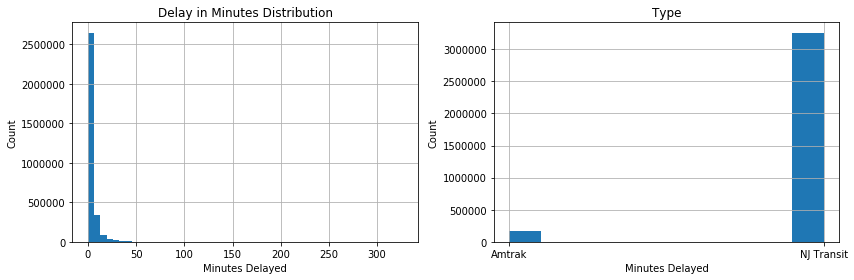

In [363]:
# Before Preprocessing

# The only continuous variable - minutes delayed
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
amtrak_full['delay_minutes'].hist(bins = 50)
plt.title('Delay in Minutes Distribution')
plt.ylabel("Count")
plt.xlabel("Minutes Delayed")

# Type
plt.subplot(1,2,2)
amtrak_full['type'].hist()
plt.title('Type')
plt.ylabel("Count")
plt.xlabel("Minutes Delayed")

plt.tight_layout()
plt.show()

In [446]:
# Preprocessing

# Subset for useful columns for analysis
amtrak = pd.DataFrame(amtrak_full[['date', 'train_id', 'from', 'to', 'delay_minutes', 'status', 'line', 'type']].copy())

# New col for 0,1 class
# 1 is late
amtrak['ontime'] = amtrak['delay_minutes']
amtrak['ontime'] = amtrak[amtrak['delay_minutes'] > 0]
mask = amtrak.delay_minutes > 0
column_name = 'ontime'
amtrak.loc[mask, column_name] = 1

# 0 is ontime
amtrak['ontime'] = amtrak['ontime'].fillna(0)
amtrak['delay_minutes'] = amtrak['delay_minutes'].fillna(0)


# Remove cancelled trains by index
cancelled = amtrak[amtrak['status'] == 'cancelled'].index
# Delete these row indexes from dataFrame
amtrak.drop(cancelled , inplace=True)

# Look at just months
pd.to_datetime(amtrak.date, format='%Y-%m-%d')
amtrak['month']  = pd.DatetimeIndex(amtrak['date']).month
amtrak['month'] = amtrak['month'].astype(int)

#Get rid of where 'from' and 'to' = 1 since this will not help us in analyzing the stations
#useless_1 = amtrak[amtrak['from'] == 1].index
#amtrak.drop(useless_1, inplace = True)

In [447]:
# Get rid of from and to for Monmouth Park and Seacaucus Conourse because they are both under 900 obs (877 and 10); not good predictors
mp = amtrak[amtrak['from'] == 'Monmouth Park'].index
amtrak.drop(mp , inplace=True)

mp = amtrak[amtrak['to'] == 'Monmouth Park'].index
amtrak.drop(mp , inplace=True)

mp = amtrak[amtrak['from'] == 'Secaucus Concourse'].index
amtrak.drop(mp , inplace=True)

mp = amtrak[amtrak['to'] == 'Secaucus Concourse'].index
amtrak.drop(mp , inplace=True)

# Only interested in the top 20 lines, remove bottom 18
lines = pd.DataFrame(amtrak['line'].value_counts().tail(18))
lines = lines.index.to_list()

for i in lines:
    drop_me = amtrak[amtrak['line'] == i].index
    amtrak.drop(drop_me, inplace = True)
    
# Remove train_id with less than 1000 observations
threshold = 1000 
train_count = amtrak['train_id'].value_counts() 
drop_me = train_count[train_count < threshold].index.values
amtrak['train_id'].loc[amtrak['train_id'].isin(drop_me)] = None
amtrak = amtrak.dropna()

# Remove to and from with less than 1000 observations
threshold = 1000 
train_count = amtrak['train_id'].value_counts() 
drop_me = train_count[train_count < threshold].index.values
amtrak['train_id'].loc[amtrak['train_id'].isin(drop_me)] = None
amtrak = amtrak.dropna()

# Remove to and from with less than 59775/59717 because my computer will crash if i dont when trying to fit
# Top 5 of each
threshold = 59775 
train_count = amtrak['to'].value_counts() 
drop_me = train_count[train_count <= threshold].index.values
amtrak['to'].loc[amtrak['to'].isin(drop_me)] = None
amtrak = amtrak.dropna()

threshold = 59000 
train_count = amtrak['from'].value_counts() 
drop_me = train_count[train_count <= threshold].index.values
amtrak['from'].loc[amtrak['from'].isin(drop_me)] = None
amtrak = amtrak.dropna()

threshold = 55000 
train_count = amtrak['from'].value_counts() 
drop_me = train_count[train_count <= threshold].index.values
amtrak['from'].loc[amtrak['from'].isin(drop_me)] = None
amtrak = amtrak.dropna()

#Train id as well because the data is still too large
threshold = 878 
train_count = amtrak['train_id'].value_counts() 
drop_me = train_count[train_count <= threshold].index.values
amtrak['train_id'].loc[amtrak['train_id'].isin(drop_me)] = None
amtrak = amtrak.dropna()

In [448]:
# Unbalance in data
count = amtrak['ontime'].value_counts()

print(f'On-time trains (Class 0) = {count[0]}\nLate trains (Class 1) = {count[1]}\nTotal Late Percentage = {count[1]/(count[0]+count[1])*100:.2f}%')

On-time trains (Class 0) = 893
Late trains (Class 1) = 2630
Total Late Percentage = 74.65%


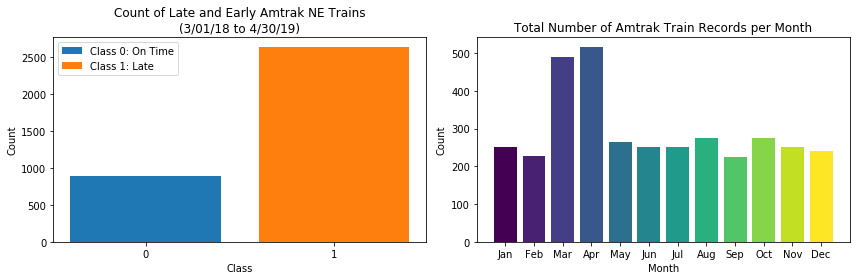

In [449]:
# Bar plot of uneven target 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(0, count[0], label = 'Class 0: On Time')
plt.bar(1, count[1], label =  'Class 1: Late')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1])
plt.legend()
plt.title('Count of Late and Early Amtrak NE Trains\n(3/01/18 to 4/30/19)')

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)

# Get count for each month
month_counts = []
for i in range(1,13):
    count_month = amtrak[amtrak['month'] == i].count()[1]
    month_counts.append(count_month)
    pass

month = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(month))

# Count per month
plt.subplot(1,2,2)
plt.bar(y_pos, month_counts, color = viridis(range(12)))
plt.title('Total Number of Amtrak Train Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(y_pos, month,  rotation='horizontal')
plt.tight_layout()

plt.show()

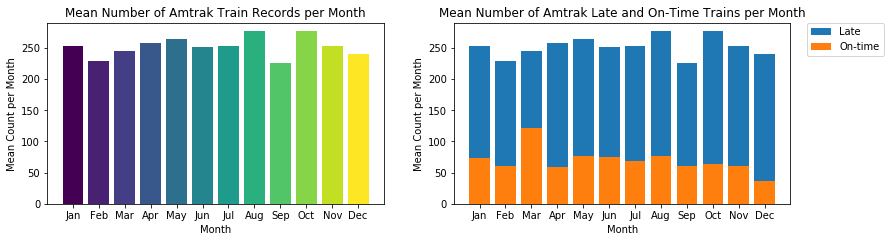

In [450]:
# Mean per month since 2 months are in both 2018 and 2019
month_counts_mean = month_counts
month_counts_mean[2] = month_counts_mean[2]/2
month_counts_mean[3] = month_counts_mean[3]/2

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.bar(y_pos, month_counts, color = viridis(range(12)))
plt.title('Mean Number of Amtrak Train Records per Month')
plt.xlabel('Month')
plt.ylabel('Mean Count per Month')
plt.xticks(y_pos, month,  rotation='horizontal')

# Df for stacked bar
ontime = amtrak[amtrak['ontime'] == 0]

# Get count for each month by ontime so can make stacked barchart
month_counts_ontime = []
for i in range(1,13):
    # Ontime
    count_month_ontime = ontime[ontime['month'] == i].count()[1]
    month_counts_ontime.append(count_month_ontime)
    pass

# Mean per month since 2 months are in both 2018 and 2019
month_counts_ontime_mean = month_counts_ontime
month_counts_ontime_mean[3] = month_counts_ontime_mean[3]/2

plt.subplot(1,2,2)
plt.bar(y_pos, month_counts, label = 'Late')
plt.title('Mean Number of Amtrak Late and On-Time Trains per Month')
plt.xlabel('Month')
plt.ylabel('Mean Count per Month')
plt.xticks(y_pos, month,  rotation='horizontal')

plt.bar(y_pos, month_counts_ontime_mean, label = 'On-time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(3)

# Show graphic
plt.show()

In [451]:
# Count By line
# After reducing the size of the data set, this no longer applies.
#line_count = []
#ontime_line = []
#line_name = amtrak['line'].unique()
#for i in range(1):
    # Late
#    count_line = amtrak[amtrak['line'] == line_name[i]].count()[1]
#    line_count.append(count_line)
#    pass

#for i in range(1):
#    # Ontime
#  count_line = ontime[ontime['line'] == line_name[i]].count()[1]
#ontime_line.append(count_line)
#    pass

#plt.figure(figsize=(6,4))
#plt.bar([1,2], line_count, label = 'Late')
#plt.xlabel('Train Line')
#plt.ylabel('Count')
#plt.xticks([1,2], line_name,  rotation='horizontal')
#plt.bar([1,2], ontime_line, label = 'On-Time')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.title('Number of Trains On-Time and Late by Train Line')
#plt.tight_layout()
#plt.show()

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?

The target variable is whether a train arrives late or not. The predictors available regarding trains, are date, train_id, from, to, delay (minutes), train line, train type (owner). I have turned the date into months, and maybe a binary variable for if a train was late or not. The data did require preprocessing. Train delay which became the binary variable 'ontime', had many NaNs which were supposed to be zeros. Trains that were cancelled were also removed as our interest is in trains that are not. There are also a large amount of categories for 'from', 'to', and 'train_id.' To combat this a threshold was set for each of these categories. The top 20 train lines were picked out of interest. For 'from' and 'to', categories were removed if they had under 1000 records. All the predictors are categorical so normalization is not needed. No duplicates were found in the data. It is also worth noting that the target variable, 'ontime' in very unbalanced. Under or oversampling may need to be used if the model does not perform well.

**(d)** What supervised learning technique will you use and why?

I have decided to use logistic regression since I am trying to clasify whether a train will be late or not. I am using logistic regression because 

In [452]:
from sklearn.utils import shuffle
# Get rid of columns not being used
amtrak = amtrak.drop(['date','delay_minutes','status','line', 'type'], axis = 1)

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# It kept freezing
#categories = ["train_id", 'from', 'to', 'line', 'type', 'month']
#onehot = OneHotEncoder()

#trainz = pd.DataFrame(onehot.fit_transform(amtrak.train_id.values.reshape(-1,1)).toarray())
#fromz = pd.DataFrame(onehot.fit_transform(amtrak['from'].values.reshape(-1,1)).toarray())
#toz = pd.DataFrame(onehot.fit_transform(amtrak.to.values.reshape(-1,1)).toarray())
#linez = pd.DataFrame(onehot.fit_transform(amtrak.line.values.reshape(-1,1)).toarray())
#typez = pd.DataFrame(onehot.fit_transform(amtrak.type.values.reshape(-1,1)).toarray())
#monthz = pd.DataFrame(onehot.fit_transform(amtrak.month.values.reshape(-1,1)).toarray())
                      
#amtrak_prept = pd.concat([trainz,fromz,toz,linez,typez,monthz], axis = 1)

In [503]:
import category_encoders as ce
onez =  ce.OneHotEncoder(return_df=False, handle_unknown="ignore")
X = np.array(amtrak['from'])


onez =  ce.OneHotEncoder(return_df=False, handle_unknown="ignore")
Y = np.array(amtrak['to'])

fromz = pd.DataFrame(onez.fit_transform(X.reshape(-1,1)), columns = ['from1','from2'])
toz = pd.DataFrame(onez.fit_transform(Y.reshape(-1,1)), columns = ['to1', 'to2', 'to3'])

amtrak_prept1= pd.concat([typez,fromz,toz], axis = 1)
amtrak_prept1

,0,from1,from2,to1,to2,to3
0,1,1.0,0.0,1.0,0.0,0.0
1,0,1.0,0.0,0.0,1.0,0.0
2,1,0.0,1.0,0.0,0.0,1.0
3,0,1.0,0.0,1.0,0.0,0.0
4,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
7041,0,NaN,NaN,NaN,NaN,NaN
7042,1,NaN,NaN,NaN,NaN,NaN
7043,0,NaN,NaN,NaN,NaN,NaN
7044,0,NaN,NaN,NaN,NaN,NaN


In [504]:
categories = ["train_id", 'month']
def prep(amtrak):
    for i in categories:
        dum = pd.get_dummies(amtrak[i], drop_first = True)
        dum = dum.rename(columns=lambda x: str(x)+i)
        amtrak_prept = pd.concat([amtrak,dum],axis=1)
        # Get rid of original column
        amtrak_prept = amtrak_prept.drop(i, axis=1)
        return amtrak_prept

amtrak_prept = prep(amtrak)
amtrak_prept = amtrak_prept.drop(['from', 'to',], axis = 1)
amtrak_prept = pd.concat([amtrak_prept, amtrak_prept1]).fillna(0)

In [505]:
amtrak_prept = amtrak_prept.drop(amtrak_prept.columns[5], axis =1)

In [506]:
from sklearn.model_selection import train_test_split
# Split 80-20 === no need since k-fold
train_set = amtrak_prept
# Drop labels from training set
train_x = train_set.drop("ontime", axis=1)

# Labels
train_y = train_set['ontime'].copy()

In [507]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

In [508]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import StratifiedKFold as kfold

#5-fold validation
K = kfold(n_splits = 5, shuffle = True, random_state = 222)
K.get_n_splits(train_x,train_y)
# print(K)

# For storing predictions
prediction_scores = np.empty(train_y.shape[0], dtype='object')

# Extract the training and validation data for this fold
for train_index, val_index in K.split(train_x, train_y):
    x_trainer, x_valid = train_x[train_index], train_x[val_index]
    y_trainer, y_valid = train_y[train_index], train_y[val_index]
    
    # Train LR classifier
    clf = LR()
    clf.fit(x_trainer, y_trainer)
    
    # Testing on validation for kth fold
    predprob =clf.predict_proba(x_valid)
    y_output = clf.predict(x_valid)

    # Save the predictions for this fold
    prediction_scores[val_index] = predprob[:, 1]

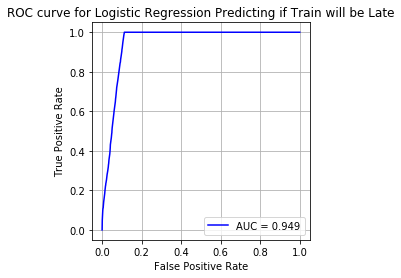

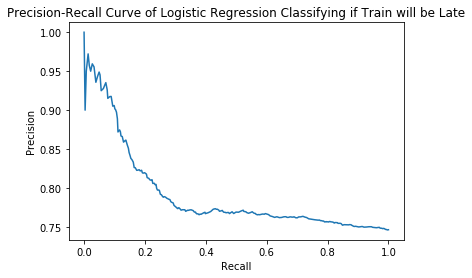

In [509]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve as PRC

# AUC
fpr, tpr, threshold = metrics.roc_curve(train_y, prediction_scores, pos_label=1)
auc = metrics.roc_auc_score(train_y, prediction_scores)
legend_string = 'AUC = {:0.3f}'.format(auc)
plt.plot(fpr,tpr, label = legend_string, c = 'b')

plt.legend()
plt.grid('on')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Logistic Regression Predicting if Train will be Late")
plt.show()

# precision,recall
precision,recall,threshold = PRC(train_y, prediction_scores, pos_label =1)
plt.plot(recall, precision, label = 'Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Logistic Regression Classifying if Train will be Late')
plt.show()

Since this did not work well, I will try again but this time I will resample to get a more even distribution of my response variable, 'ontime.'

In [510]:
# Over sampling
class0 = amtrak_prept[amtrak_prept['ontime'] == 1]
newdf = class0.sample(9000, replace = True)
amtrak_prept_oversamp = amtrak_prept.append(newdf)

In [511]:
amtrak_prept = amtrak_prept_oversamp

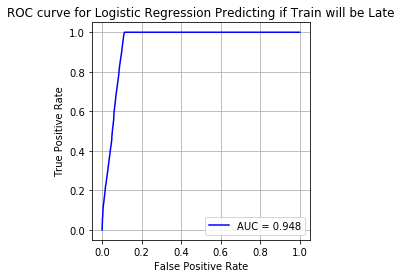

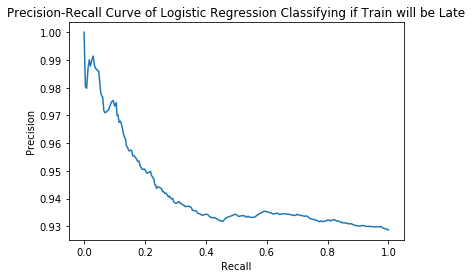

In [512]:
train_set = amtrak_prept_oversamp
train_set= train_set.fillna(0)
# Drop labels from training set
train_x = train_set.drop("ontime", axis=1)

# Labels
train_y = train_set['ontime'].copy()

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import StratifiedKFold as kfold

#5-fold validation
K = kfold(n_splits = 5, shuffle = True, random_state = 222)
K.get_n_splits(train_x,train_y)
# print(K)

# For storing predictions
prediction_scores = np.empty(train_y.shape[0], dtype='object')

# Extract the training and validation data for this fold
for train_index, val_index in K.split(train_x, train_y):
    x_trainer, x_valid = train_x[train_index], train_x[val_index]
    y_trainer, y_valid = train_y[train_index], train_y[val_index]
    
    # Train LR classifier
    clf = LR()
    clf.fit(x_trainer, y_trainer)
    
    # Testing on validation for kth fold
    predprob =clf.predict_proba(x_valid)
    y_output = clf.predict(x_valid)

    # Save the predictions for this fold
    prediction_scores[val_index] = predprob[:, 1]

    from sklearn import metrics
from sklearn.metrics import precision_recall_curve as PRC

# AUC
fpr, tpr, threshold = metrics.roc_curve(train_y, prediction_scores, pos_label=1)
auc = metrics.roc_auc_score(train_y, prediction_scores)
legend_string = 'AUC = {:0.3f}'.format(auc)
plt.plot(fpr,tpr, label = legend_string, c = 'b')

plt.legend()
plt.grid('on')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Logistic Regression Predicting if Train will be Late")
plt.show()

# precision,recall
precision,recall,threshold = PRC(train_y, prediction_scores, pos_label =1)
plt.plot(recall, precision, label = 'Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Logistic Regression Classifying if Train will be Late')
plt.show()

In [513]:
# Try to interpret
predictors = amtrak_prept_oversamp.columns.tolist()
predictors.pop(0)
coef = clf.coef_.tolist()
    
print(f'Intercept = {clf.intercept_}')
print(f'Predictors = {predictors}')
print(f'Coefficient Estimates = {coef}')

Intercept = [-1.48510296]
Predictors = ['month', '3835train_id', '3839train_id', '3841train_id', 'from1', 'from2', 'to1', 'to2', 'to3']
Coefficient Estimates = [[0.4519105583052857, 1.8325072773088882, 2.5820994316771366, 1.9220223801552176, -3.2474313063368276, -2.268152205006333, -1.62103363666819, -1.6263976696686389, -2.268152205006333]]


In [489]:
clf.intercept_

array([-1.45646544])

In [514]:
amtrak['to'].value_counts()

Secaucus Upper Lvl       1175
New York Penn Station    1175
Newark Penn Station      1173
Name: to, dtype: int64

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or  𝑅2  for regression)?


This this is a binary classificaiton problem, ROC curves and confusion matrix metrics will be used to evaluate whether I succeeded. Precision-Recall curves will also tell me if I succeeded.

**(f,g,h)** 

I choose to user K-fold validation due to the number of observations I had. I didn't have a large amount of data after I filtered some data out, so 5-fold validation would allow me to use all the reamining data while still getting an accurate ROC curve. In my approach, I attempted to oversample the response variable where ' = 0 (on-time train). Since there were about 3 times as many observations in class 1 than in class 0, I resampled with replacement from class 0 until I got equal amounts of outcomes for the target variable. I combined dataframes and ran this through again. While my AUC did look good, at 0.948. My precision-recall curve did not look good for both the original data set, and the dataset with resampled class 0 outcomes. Plots are displayed above.

While my logistic regression had a great AUC of 0.948, for both the original and resampled dataset, I was unable to achieve a good recall-precision curve (which would indicate that the model is truly classifying well.) This likely indicates that the model is overfit and that I should attempt to include more observations in the data or perhaps reduce the number of variables. 

Unfortunately, logistic regression models lack interpretability but we can still understand general trends within the data by looking at the coefficient estimates. As month increases from Jan all the way to December, the odds of the train being late decreases., with all else constant. Train 3835 predicts for the highest likelihood of a train arriving late out of all the train_ids. Trains departing from Penn Station, NY instead of Seacuss also predict a higher chance of running late. Trains going to Secaucus and PENN Station predict for the least likelihood of being late out of all the destinations looked at. Newark Penn Station, as a destination, predicts for the greatest increase in delays compared to other destinations. 

**Future Directions:**

I hope to improve this model by reworking the data and getting more observations by using less restrictive filters. I would like to examine a wider variety of trains, destinations, and departures. Doing this would also help solve the overfitting problem currently present. In addition, I would like to try different resampling techniques such as SMOTE and bootstrap. It would also be useful to bin the months into the seasons as this provides a way of interpreting the effect of weather on train delays. Other classification methods would be useful as they have higher predictive power. Random forest and support vector machines could offer additional insight. Futher, it would be useful to estimate how late a train will be by modeling minutes_delayed with a linear regression. 